# Setup

In [4]:
import sys
sys.path.insert(
    0, '/home/student.unimelb.edu.au/shorte1/Documents/TINT')

In [5]:
import sys
sys.path.insert(0, '/home/563/esh563/TINT')

In [6]:
# Core
import datetime
import os
import glob
import tempfile
import pickle
import copy

# Analysis
import numpy as np
import pandas as pd
import xarray as xr

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

# Debugging
import pdb, traceback
# %load_ext line_profiler

# Radar Tools
import pyart
import tint
# import tint.animate
# from tint.visualisation import animate

import CPOL_func as cf
import caine_func as caf
import analysis

# Convenience functions
%load_ext autoreload
%autoreload 1
%aimport CPOL_func
%aimport caine_func
%aimport tint.visualisation.figures
%aimport tint.visualisation.animate
%aimport tint.visualisation.horizontal_helpers
%aimport tint.visualisation.vertical_helpers
%aimport tint.tracks
%aimport tint.objects
%aimport tint.grid_utils
%aimport tint.steiner
%aimport tint.matching
%aimport tint.rain
%aimport tint.cells
%aimport tint.tracks_helpers
%aimport tint.process_ERA5
%aimport tint.process_WRF

%pdb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Automatic pdb calling has been turned OFF


In [9]:
base_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/CPOL/'
save_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_tracks/'
fig_dir = '/home/student.unimelb.edu.au/shorte1/Documents/TINT_figures/'
ERA5_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/era5/'
ERA5_dir += 'pressure-levels/reanalysis/'
WRF_dir = '/media/shorte1/Ewan\'s Hard Drive/phd/data/caine_WRF_data/'

In [8]:
base_dir = '/g/data/hj10/cpol/cpol_level_1b/v2020/gridded/grid_150km_2500m/'
save_dir = '/home/563/esh563/TINT_tracks/'
fig_dir = '/home/563/esh563/TINT_figures/'
ERA5_dir = '/g/data/rt52/era5/pressure-levels/reanalysis/'

In [71]:
dates = np.arange(
    np.datetime64('2005-11-13 00:00'), 
    np.datetime64('2005-11-14 00:00'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = cf.CPOL_files_from_datetime_list(
    dates, base_dir=base_dir)

micro_physics = 'cpol'

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'ERA5', 'AMBIENT_BASE_DIR': ERA5_dir,
    'GS_ALT': 1000,
    'LEVELS': np.array(
        [[1000, 1500], [500, 20000]]),
    'WIND_LEVELS': np.array(
        [[500, 3500], [500, 20000]]),
    'FIELD_THRESH': ['convective', 15],
    'MIN_SIZE': [80, 800],
    'ISO_THRESH': [10, 10],
    'AMBIENT': 'ERA5', 
    'AMBIENT_BASE_DIR': ERA5_dir})

Gathering files.


In [5]:
micro_physics = 'lin'

dates = np.arange(
    np.datetime64('2006-02-08 12:00'), 
    np.datetime64('2006-02-13 10:10'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = caf.caine_files_from_datetime_list(
    dates, micro_physics=micro_physics, 
    base_dir=WRF_dir)

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'WRF', 'AMBIENT_BASE_DIR': WRF_dir + 'lind02/'})

Gathering files.


In [10]:
micro_physics = 'thompson'

dates = np.arange(
    np.datetime64('2006-02-08 12:00'), 
    np.datetime64('2006-02-13 10:10'),
    np.timedelta64(10, 'm'))

filenames, start_time, end_time = caf.caine_files_from_datetime_list(
    dates, micro_physics=micro_physics, 
    base_dir=WRF_dir)

tracks_obj  = tint.Tracks(params={
    'AMBIENT': 'WRF', 'AMBIENT_BASE_DIR': WRF_dir + 'thompsond02/'})

SyntaxError: invalid syntax (2632735802.py, line 14)

# Create Tracks

In [72]:
b_path = '/home/student.unimelb.edu.au/shorte1/Documents/'
b_path += 'CPOL_analysis/circ_b_ind_set.pkl'
with open(b_path, 'rb') as f:
    b_ind_set = pickle.load(f)

In [73]:
def gen_tracks(tracks_obj, filenames, b_path=None):

    grids = (
        pyart.io.read_grid(fn, include_fields = ['reflectivity'])
        for fn in filenames)
      
    tracks_obj.get_tracks(grids, b_path=b_path)
        
    return tracks_obj

In [74]:
tracks_obj = gen_tracks(tracks_obj, filenames, b_path=b_path)

Getting ERA5 metadata.
Getting Intepolated ERA5 for next hour.
No objects found in scan 0.
No objects found in scan 1.
No objects found in scan 2.
No objects found in scan 3.
No objects found in scan 4.
No objects found in scan 5.
No objects found in scan 6.
No objects found in scan 7.
No objects found in scan 8.
No objects found in scan 9.
No objects found in scan 10.
No objects found in scan 11.
No objects found in scan 12.
No objects found in scan 13.
No objects found in scan 14.
No objects found in scan 15.
No objects found in scan 16.
No objects found in scan 17.
No objects found in scan 18.
No objects found in scan 19.
No objects found in scan 20.
No objects found in scan 21.
No objects found in scan 22.
No objects found in scan 23.
No objects found in scan 24.
No objects found in scan 25.
No objects found in scan 26.
No objects found in scan 27.
No objects found in scan 28.
No objects found in scan 29.
No objects found in scan 30.
No objects found in scan 31.
No objects found in

In [69]:
current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")
out_file_name = save_dir + 'test.pkl'.format(
    micro_physics, current_time)
with open(out_file_name, 'wb') as f:
    pickle.dump(tracks_obj, f)

PicklingError: Can't pickle <class 'tint.tracks.Tracks'>: it's not the same object as tint.tracks.Tracks

In [51]:
tracks_obj = tint.objects.classify_tracks(tracks_obj)
tracks_obj = tint.objects.get_exclusion_categories(tracks_obj)

In [19]:
with open(save_dir + 'test.pkl', 'rb') as f:
    tracks_obj = pickle.load(f)

Generating figure for 2005-11-13T15:50.


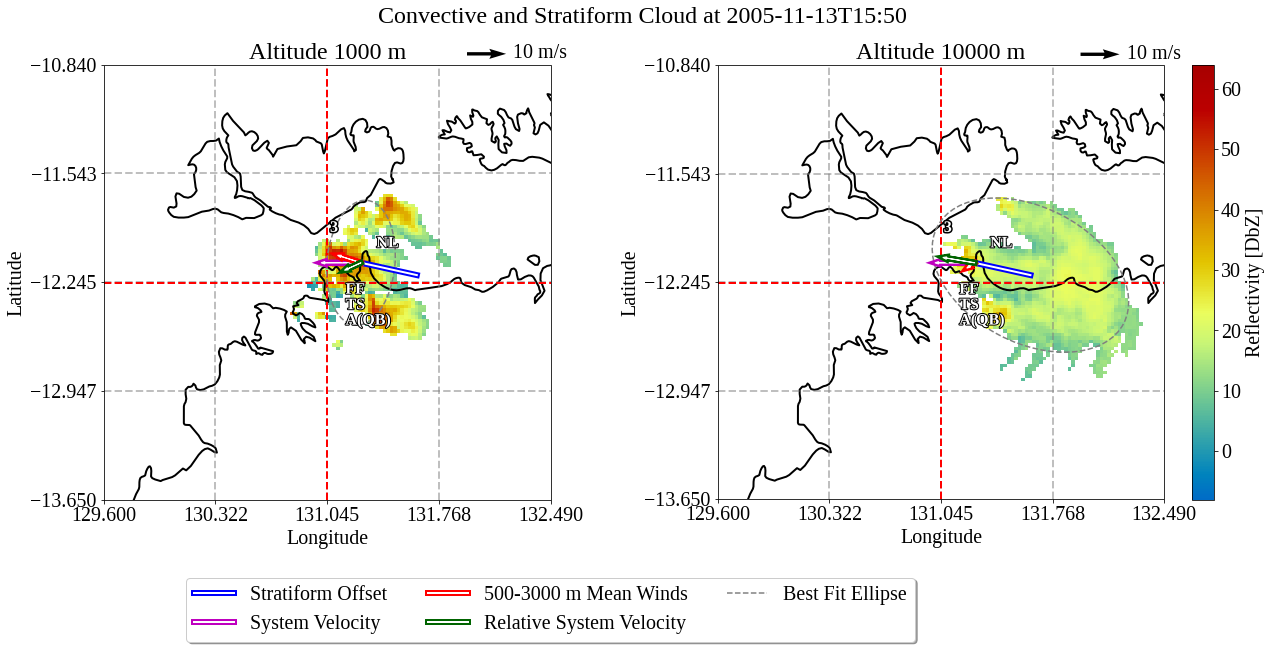

In [108]:
filename = filenames[95]
grid = pyart.io.read_grid(filename, include_fields=['reflectivity'])

current_time = str(datetime.datetime.now())[0:-7]
current_time = current_time.replace(" ", "_").replace(":", "_")
current_time = current_time.replace("-", "")

params = {
    'uid_ind': None, 'line_coords': False, 'center_cell': False,
    'cell_ind': 10, 'winds': False, 'winds_fn': filename,
    'crosshair': True, 'fontsize': 20, 'colorbar_flag': True,
    'leg_loc': 2, 'label_type': 'velocities',
    'system_winds': ['shift', 'ambient_mean', 'relative'],
    'boundary': False, 'exclude': False}

tint.visualisation.figures.two_level(
    tracks_obj, grid, params=params, alt1=1000, alt2=10000)
plt.savefig(
    fig_dir + '/test_{}.png'.format(current_time), 
    dpi=200, facecolor='w', edgecolor='white', bbox_inches='tight')